[-3.82181266e-09 -7.64576499e-05 -1.52909944e-04 ...  3.38890423e-04
  4.10526745e-04  4.82136450e-04]


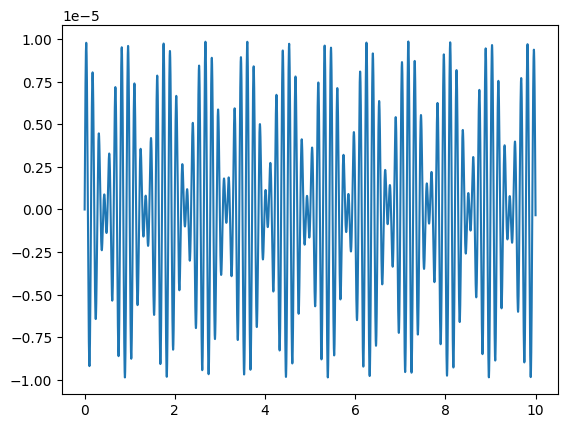

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

def flujo_mag(t):       
    flujo= (np.pi*(0.05**2)) *0.05*np.cos(3.5*t) *np.cos(2*np.pi*7*t)
    return flujo

def Dflujo(f, t, h=1e-8):
    d = (flujo_mag(t+h) - flujo_mag(t))/h
    return d

print(Dflujo(f,t))

def corriente(t):
    I= (-1*Dflujo(flujo_mag, t))/1750
    return I

t= np.linspace(0, 10, 10000) 
I= corriente(t)
plt.plot(t, I)
plt.show()

1.75
[0.03571428571428571, 0.03571428571428571, 0.03571428571428571]


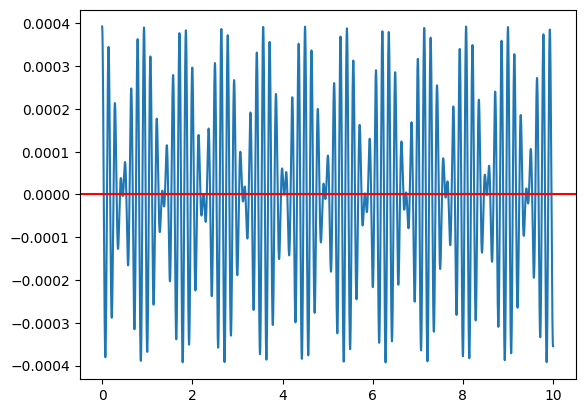

In [125]:
y = flujo_mag(t)
plt.plot(t,y)
plt.axhline(y = 0,color='r')

#raíces
def newtonraphson(f,df,xn,itmax=100,precision=1e-8):
    error=1
    it=0
    while error > precision and it < itmax:
        try:
            xn1=xn-(f(xn)/df(f,xn))
            error=np.abs(f(xn)/df(f,xn))
        except ZeroDivisionError:
            print("división por cero")
        xn= xn1 
        it+=1
    if it==itmax:
        return False
    else:
        return xn

raiz= newtonraphson(flujo_mag,Dflujo,1)
print(raiz)

def todas_las_raices(x,tolerancia=10):
    raices=np.array([])
    resultado=[]
    for i in x:
        
        raiz=newtonraphson(flujo_mag,Dflujo,i)
        
        if raiz != False :
            if raiz>= t[0] and raiz<=t[len(t)-1]:
                #if len(raices) <= 2:
                raices=np.append(raices,raiz)
    raices.sort()
    resultado.append(raices[0])
    resultado.append(raices[1])
    resultado.append(raices[2])     
    
    return resultado


raices=todas_las_raices(t)
print(raices)